<a href="https://colab.research.google.com/github/2303a51975/nlp_project/blob/main/nlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1**

**04/08/2025**

You're working on an HR analytics tool. The goal is to preprocess text from resumes to extract relevant skills, using clean and consistent tokens.

Use the Resume Dataset or simulated resumes.

Section A: Load & Explore
Q1. Load sample resumes and display first 3 rows. Check for noisy characters like \n, •, and symbols.

Section B: NLTK Preprocessing
Q2. Use NLTK to:

·       Clean special characters and digits

·       Tokenize and stem

·       Remove stop words

·       Extract top 10 frequent stemmed words

Section C: spaCy Pipeline
Q3. Use spaCy to:

·       Tokenize and lemmatize

·       Filter tokens: only include alphabetic nouns and verbs

·       Extract top 10 frequent lemmas

In [ ]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
import subprocess
try:
    nlp = spacy.load("en_core_web_sm")
except:
    subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load("en_core_web_sm")
data = {
    "Resume_Text": [
        "Experienced Python Developer with knowledge of ML & AI.\n• Worked on projects using TensorFlow, Pandas, and NumPy.",
        "Data Analyst skilled in SQL, Excel, and visualization tools like Power BI and Tableau.",
        "Software Engineer proficient in Java, C++, and web technologies — HTML, CSS, JavaScript."
    ]
}
df = pd.DataFrame(data)
print("----- SECTION A: FIRST 3 RESUMES -----\n")
print(df.head(3))
def detect_noise(text):
    noise_chars = re.findall(r"[\n•@#$%^&*()_+=\[\]{};:'\",<>/?\\|`~]", text)
    return noise_chars
df["Noise_Chars"] = df["Resume_Text"].apply(detect_noise)
print("\n----- Detected noisy characters -----\n")
print(df[["Resume_Text", "Noise_Chars"]])

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    return text
def preprocess_nltk(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(w) for w in tokens if w not in stop_words]
    return tokens
df["Stemmed_Tokens"] = df["Resume_Text"].apply(preprocess_nltk)
all_tokens = [token for tokens in df["Stemmed_Tokens"] for token in tokens]
freq_words = Counter(all_tokens).most_common(10)
print("\n----- SECTION B: Top 10 frequent stemmed words (NLTK) -----\n")
print(freq_words)

def preprocess_spacy(text):
    doc = nlp(text)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.pos_ in ["NOUN", "VERB"]]
    return lemmas
df["Lemmas"] = df["Resume_Text"].apply(preprocess_spacy)
all_lemmas = [lemma for lemmas in df["Lemmas"] for lemma in lemmas]
freq_lemmas = Counter(all_lemmas).most_common(10)
print("\n----- SECTION C: Top 10 frequent lemmas (spaCy) -----\n")
print(freq_lemmas)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


----- SECTION A: FIRST 3 RESUMES -----

                                         Resume_Text
0  Experienced Python Developer with knowledge of...
1  Data Analyst skilled in SQL, Excel, and visual...
2  Software Engineer proficient in Java, C++, and...

----- Detected noisy characters -----

                                         Resume_Text         Noise_Chars
0  Experienced Python Developer with knowledge of...    [&, \n, •, ,, ,]
1  Data Analyst skilled in SQL, Excel, and visual...              [,, ,]
2  Software Engineer proficient in Java, C++, and...  [,, +, +, ,, ,, ,]

----- SECTION B: Top 10 frequent stemmed words (NLTK) -----

[('experienc', 1), ('python', 1), ('develop', 1), ('knowledg', 1), ('ml', 1), ('ai', 1), ('work', 1), ('project', 1), ('use', 1), ('tensorflow', 1)]

----- SECTION C: Top 10 frequent lemmas (spaCy) -----

[('experience', 1), ('knowledge', 1), ('work', 1), ('project', 1), ('use', 1), ('skille', 1), ('visualization', 1), ('tool', 1), ('proficient', 1), (

# Assignment 2

**11/08/2025**

Section A: Load & Explore
Q1. Load sample resumes and display first 3 rows. Check for noisy characters like \n, •, and symbols.

Section B: NLTK Preprocessing
Q2. Use NLTK to:
->Clean special characters and digits
->Tokenize and stem
->Remove stop words
->Extract top 10 frequent stemmed words

Section C: spaCy Pipeline
Q3. Use spaCy to:
->Tokenize and lemmatize
->Filter tokens: only include alphabetic nouns and verbs
->Extract top 10 frequent lemmas

In [ ]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
data = pd.DataFrame({
    'Resume': [
        "Experienced Software Engineer with 5+ years in Python, Java, and SQL.\n• Worked on AI and ML projects.",
        "Data Analyst skilled in Excel, Tableau, and Python. • Experienced in data cleaning and visualization!",
        "Network Engineer with strong knowledge of Cisco routers, firewalls, and cloud networking solutions."
    ]
})
print("First 3 Rows:\n", data.head(3))
print("\nChecking for noisy characters like \\n, •, and symbols:")
for i in range(3):
    print(f"\nResume {i+1}:\n{data['Resume'][i]}")
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text
def preprocess_nltk(text):
    cleaned = clean_text(text)
    tokens = nltk.word_tokenize(cleaned)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return tokens
data['NLTK_Tokens'] = data['Resume'].apply(preprocess_nltk)
all_words = [word for tokens in data['NLTK_Tokens'] for word in tokens]
freq_dist = Counter(all_words)
print("\nTop 10 Frequent Stemmed Words (NLTK):")
print(freq_dist.most_common(10))
nlp = spacy.load("en_core_web_sm")
def preprocess_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.pos_ in ['NOUN', 'VERB']]
    return tokens
data['Spacy_Lemmas'] = data['Resume'].apply(preprocess_spacy)
all_lemmas = [lemma for lemmas in data['Spacy_Lemmas'] for lemma in lemmas]
lemma_freq = Counter(all_lemmas)
print("\nTop 10 Frequent Lemmas (spaCy):")
print(lemma_freq.most_common(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First 3 Rows:
                                               Resume
0  Experienced Software Engineer with 5+ years in...
1  Data Analyst skilled in Excel, Tableau, and Py...
2  Network Engineer with strong knowledge of Cisc...

Checking for noisy characters like \n, •, and symbols:

Resume 1:
Experienced Software Engineer with 5+ years in Python, Java, and SQL.
• Worked on AI and ML projects.

Resume 2:
Data Analyst skilled in Excel, Tableau, and Python. • Experienced in data cleaning and visualization!

Resume 3:
Network Engineer with strong knowledge of Cisco routers, firewalls, and cloud networking solutions.

Top 10 Frequent Stemmed Words (NLTK):
[('experienc', 2), ('engin', 2), ('python', 2), ('data', 2), ('network', 2), ('softwar', 1), ('year', 1), ('java', 1), ('sql', 1), ('work', 1)]

Top 10 Frequent Lemmas (spaCy):
[('experience', 2), ('engineer', 2), ('python', 2), ('datum', 2), ('network', 2), ('software', 1), ('year', 1), ('work', 1), ('project', 1), ('analyst', 1)]


# Assignment 3

**18/08/2025**

You work at a customer service automation company. You are tasked with analyzing the grammatical structure of customer complaint texts to understand patterns in how users express dissatisfaction.

Use the legal text classification dataset or simulate a dataset with columns

Section A: Load and Inspect Data
Q1. Load the dataset and display:

First 25 complaint texts
Q2. Apply the following pipeline using SpaCY:

Tokenization
POS tagging using pos_tag()
Count frequency of POS tags (e.g., NN, VB, JJ)
🔹 Section C: POS Tagging with spaCy
Q3. Perform POS tagging using spaCy and:

Extract only verbs and adjectives
Visualize top 10 verbs and top 10 adjectives in bar charts

"My phone number is 1234567890 and my email is test@domain.com"

"Visit https://example.com for more info!!!"

"HELLO!!! This is SOOOOO exciting :))"

"Contact us at info@company.org or call +91 98765-43210"

"Python's regex is very useful!!!  #Coding #Fun"



Find Phone Numbers,

Remove ph numbers, emails, and URLs, special characters.

DataFrame columns: Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')
First 25 Complaint Texts:

2059027  male    15     and 4.5 MB of .pdf files) Now i have to wait ...
                 15                                                 None
                 15                                                 None
3581210  male    33                                                 None
                 33     it was from a taxi with my phone-camera) actu...
3539003  female  14     and he is a guy... Right? O: Of course he is ...
4172416  female  25     CAN you tell!- god how do i create a links co...
3668238  female  17       ~Disturbed Angel - Beautifully Decayed~      "
4030905  female  17                                                 None
                 17                                                 None
                 17                                                 None
                 17     sure die one..  haiz..tml den go for piano lo..

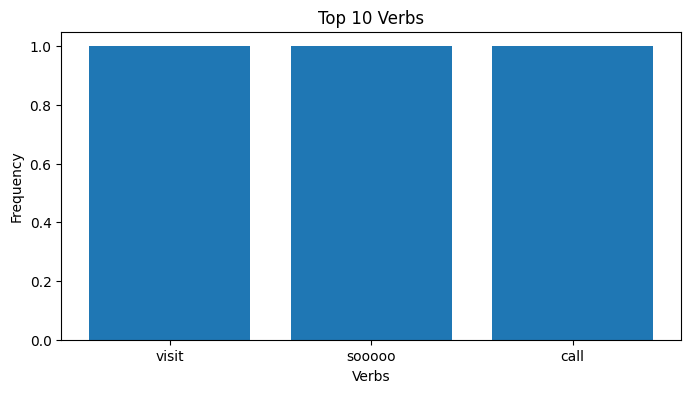

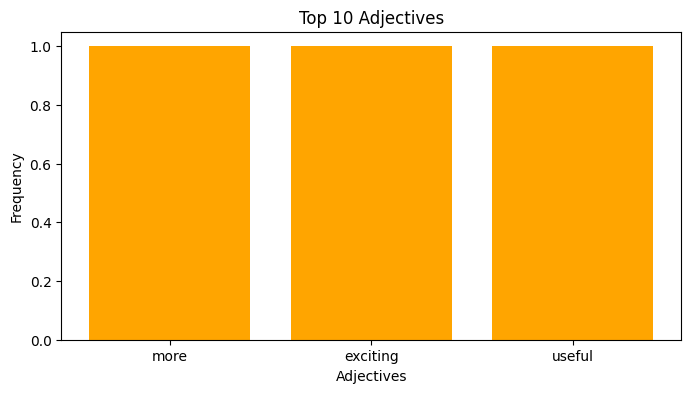

In [ ]:
import pandas as pd
import spacy
from collections import Counter
import re
import matplotlib.pyplot as plt
data = pd.read_csv("/content/blogtext[1].csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print("DataFrame columns:", data.columns)
print("First 25 Complaint Texts:\n")
print(data['text'].head(25))
nlp = spacy.load("en_core_web_sm")
all_pos = []
for text in data['text'][:25]:
    doc = nlp(str(text))
    all_pos.extend([token.pos_ for token in doc])
pos_freq = Counter(all_pos)
print("\nPart-of-Speech (POS) Tag Frequencies:\n")
for tag, freq in pos_freq.items():
    print(tag, ":", freq)

nlp = spacy.load("en_core_web_sm")
texts = [
    "My phone number is 1234567890 and my email is test@domain.com",
    "Visit https://example.com for more info!!!",
    "HELLO!!! This is SOOOOO exciting :))",
    "Contact us at info@company.org or call +91 98765-43210",
    "Python's regex is very useful!!!  #Coding #Fun"
]
cleaned_texts = []
for text in texts:
    text = re.sub(r'\+?\d[\d\-\s]{8,}\d', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.strip()
    cleaned_texts.append(text)
combined_text = " ".join(cleaned_texts)
print("Cleaned Text:\n", combined_text, "\n")
doc = nlp(combined_text)
verbs = [token.lemma_.lower() for token in doc if token.pos_ == "VERB"]
adjectives = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ"]
verb_counts = Counter(verbs)
adj_counts = Counter(adjectives)
top_verbs = verb_counts.most_common(10)
top_adjs = adj_counts.most_common(10)
print("Top Verbs:", top_verbs)
print("Top Adjectives:", top_adjs)
if top_verbs:
    verbs_x, verbs_y = zip(*top_verbs)
    plt.figure(figsize=(8,4))
    plt.bar(verbs_x, verbs_y)
    plt.title("Top 10 Verbs")
    plt.xlabel("Verbs")
    plt.ylabel("Frequency")
    plt.show()
if top_adjs:
    adjs_x, adjs_y = zip(*top_adjs)
    plt.figure(figsize=(8,4))
    plt.bar(adjs_x, adjs_y, color='orange')
    plt.title("Top 10 Adjectives")
    plt.xlabel("Adjectives")
    plt.ylabel("Frequency")
    plt.show()

# Assignment 4

**25/08/2025**

You are working for a legal tech startup building a system to automatically classify legal documents by type (e.g., contracts, wills, affidavits). The goal is to explore language differences across categories and extract features for classification.

Section A: Text Processing
Q1. Load and explore the dataset: show document counts per type.

Q2. Clean the text:

Remove legal stop words (herein, thereof, etc.)
Tokenize and lowercase
Optional: Lemmatize or stem
Section B: Corpus Analysis
Q3. Create a bar chart of the average document length per category.

Q4. Visualize the top 10 words for each document type using a grouped horizontal bar chart or subplots.

Q5. Use CountVectorizer with ngram_range=(1,2) to capture word bigrams.

Q6. Print:

Vocabulary size
Most common bigrams across all documents

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                id    gender  age topic   sign  \
2059027 male 15            Student       Leo  "14   May  2004"   
             15            Student       Leo  "13   May  2004"   
             15            Student       Leo  "12   May  2004"   
3581210 male 33  InvestmentBanking  Aquarius  "29  June  2004"   
             33  InvestmentBanking  Aquarius  "29  June  2004"   

                                                              date  \
2059027 male 15     "           Info has been found (+/- 100 pages   
             15  "           These are the team members:   Drew...   
             15      "           testing!!!  testing!!!          "   
3581210 male 33  "              urlLink    The business class t...   
             33  "             I often wondered where the resta...   

                                                              text  
2059027 male 15   and 4.5 MB of .pdf files) Now i have to wait ...  
             15                             

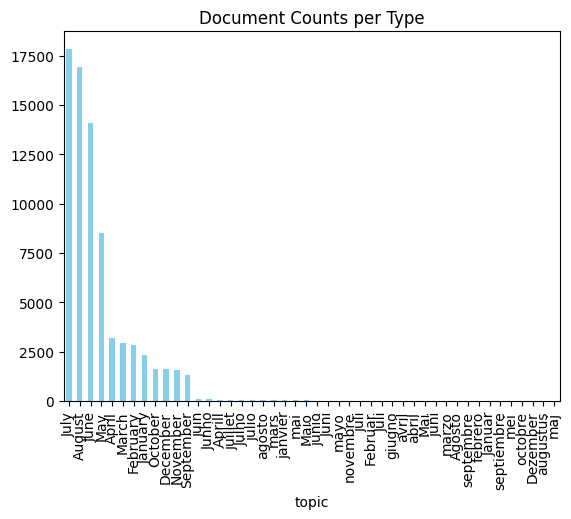

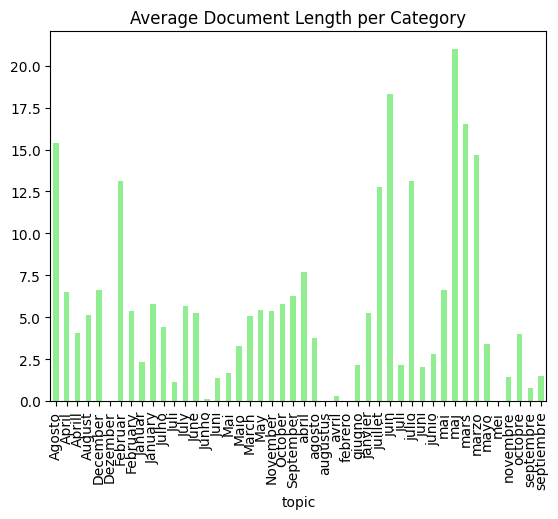

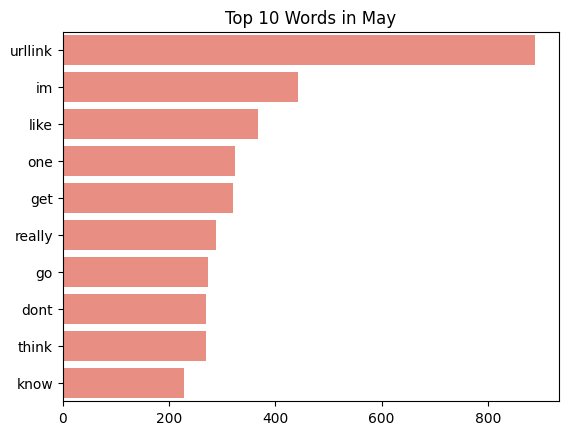

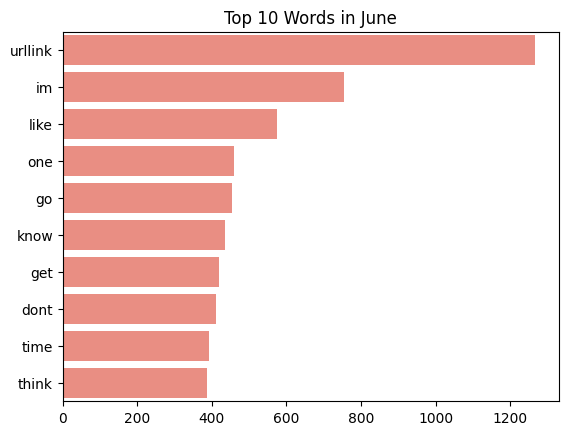

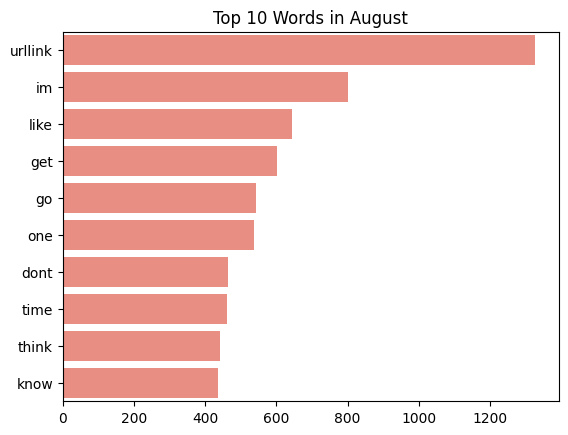

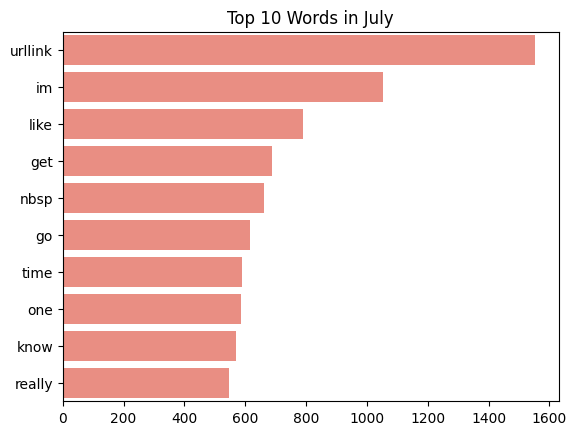

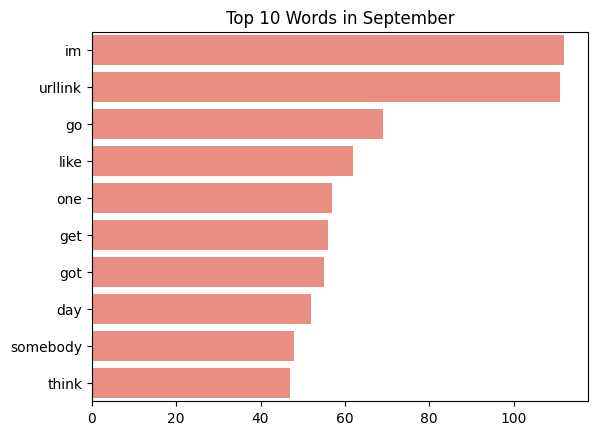

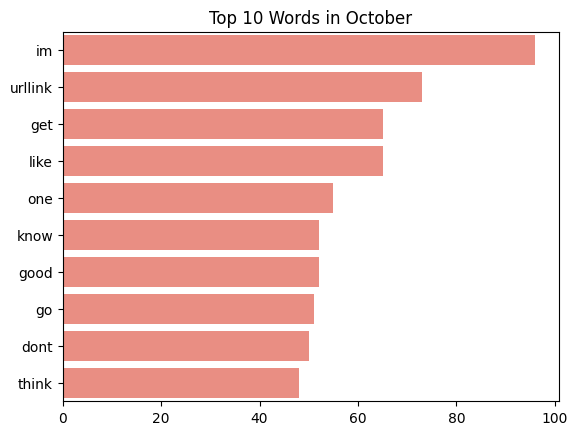

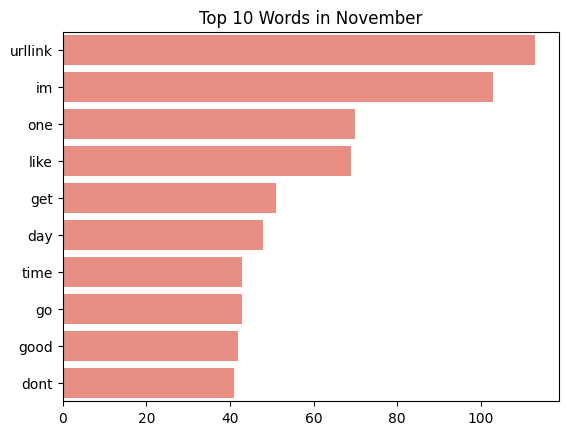

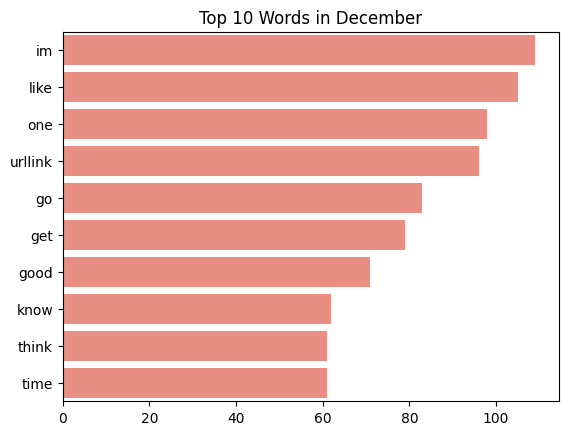

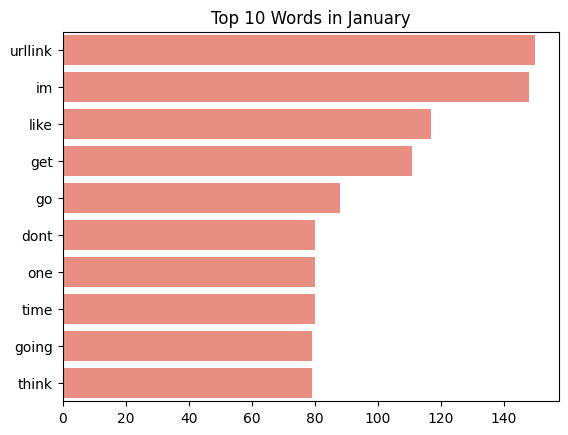

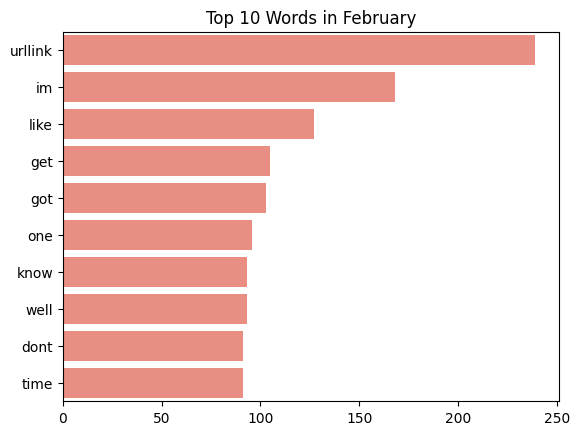

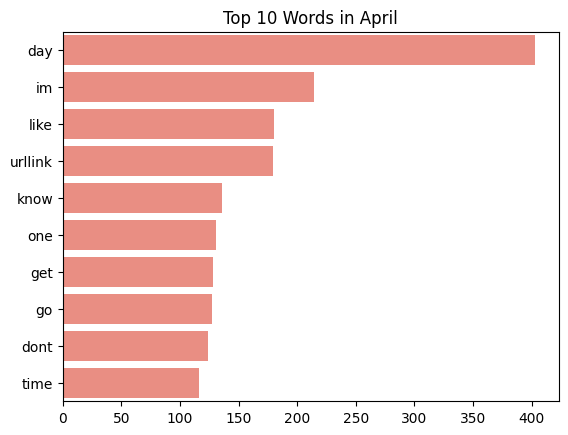

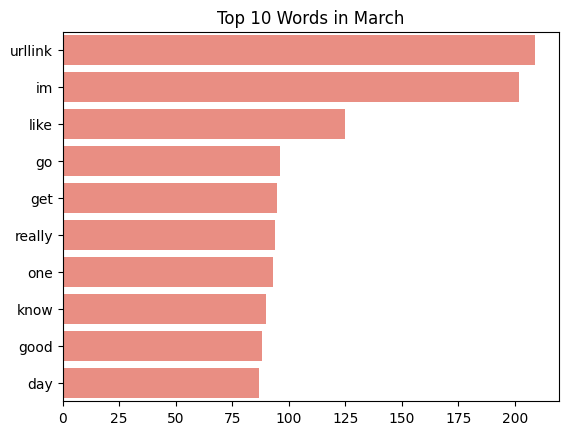

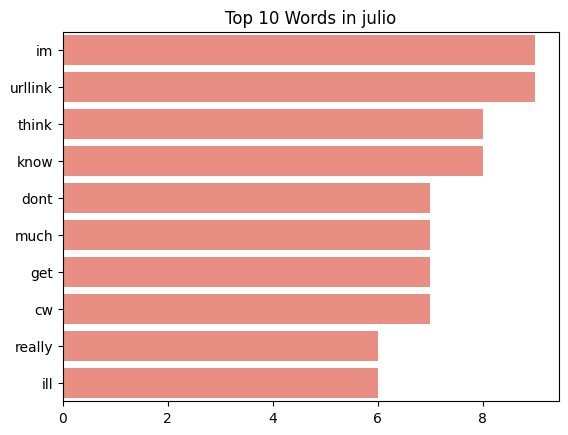

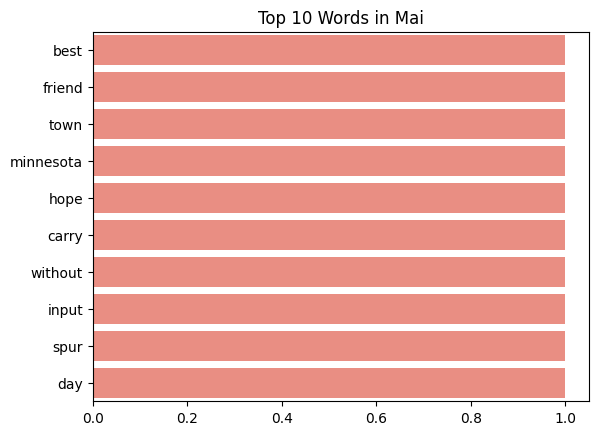

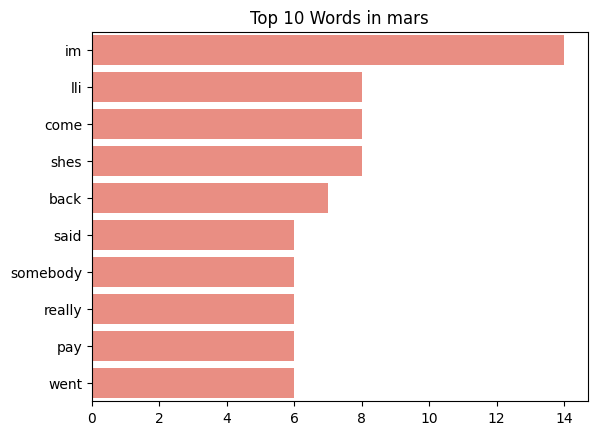

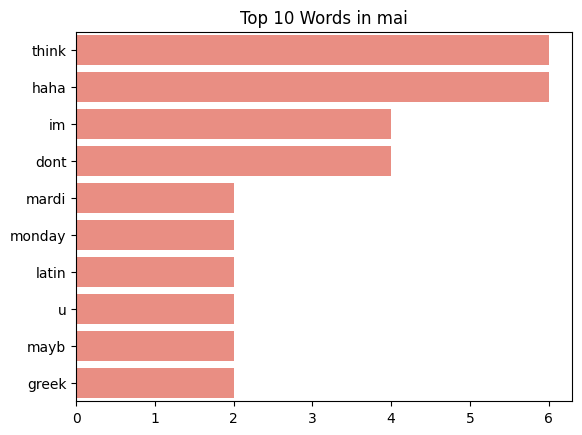

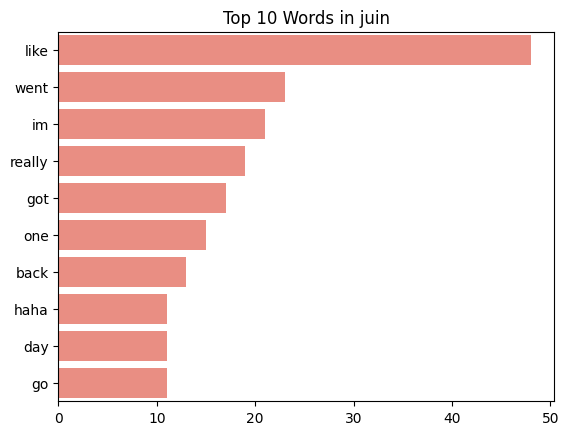

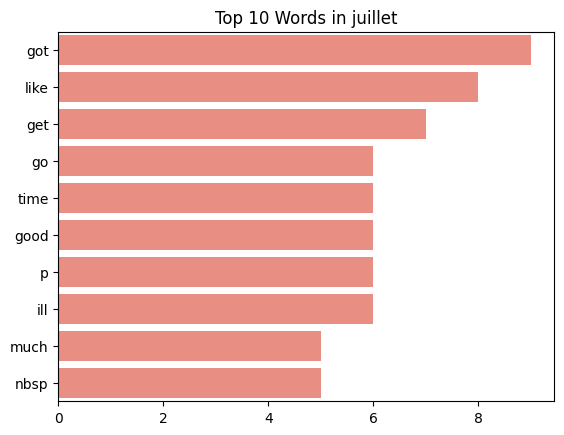

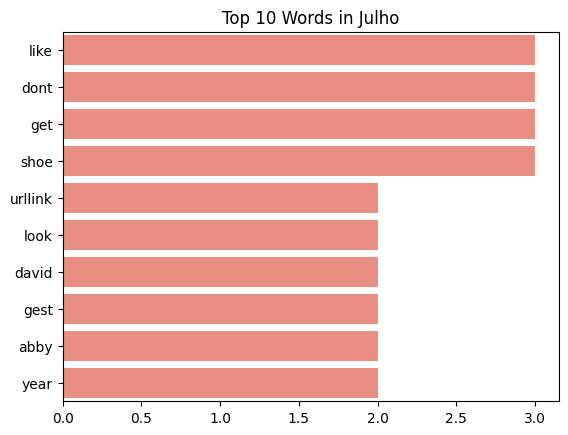

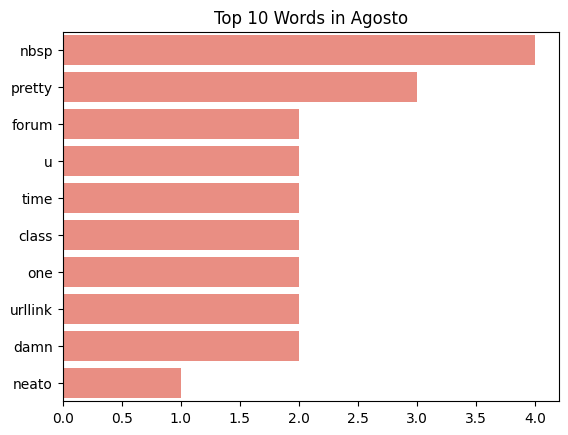

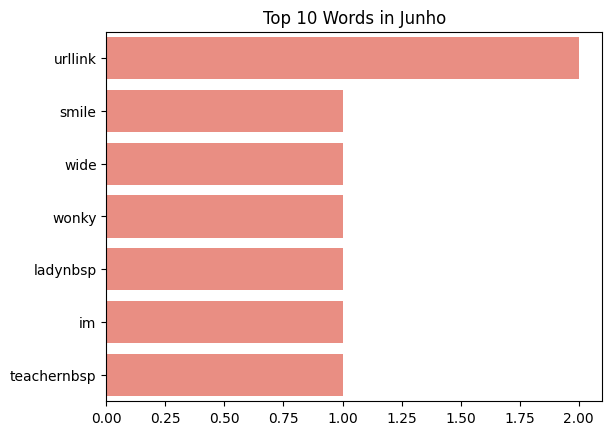

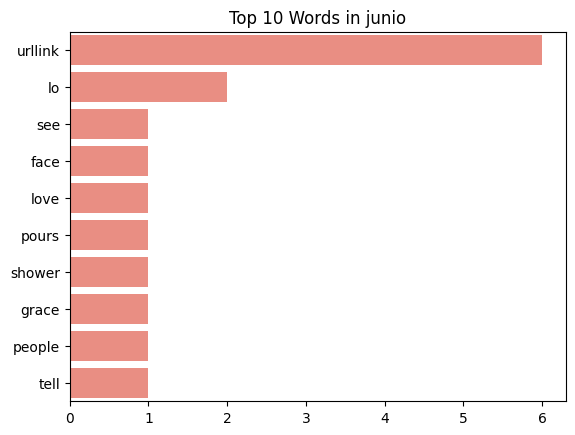

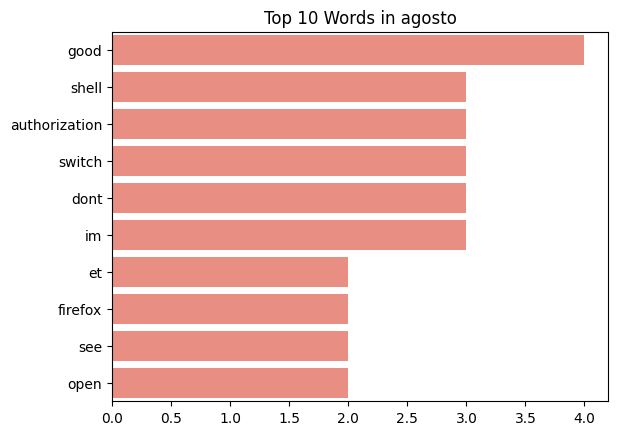

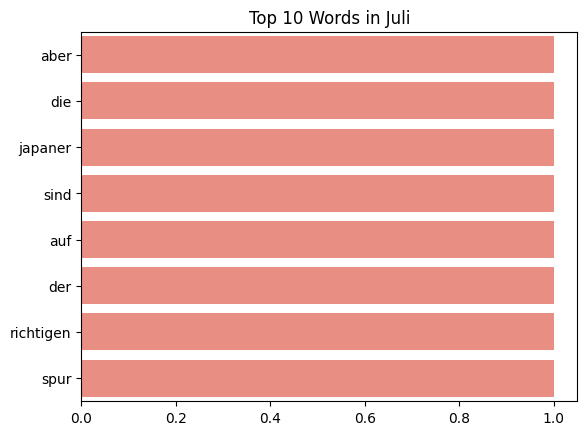

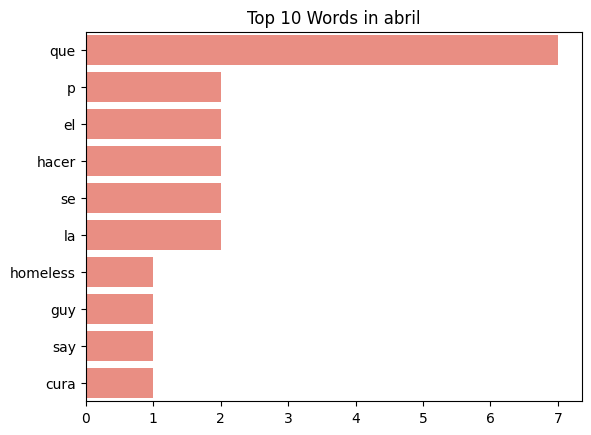

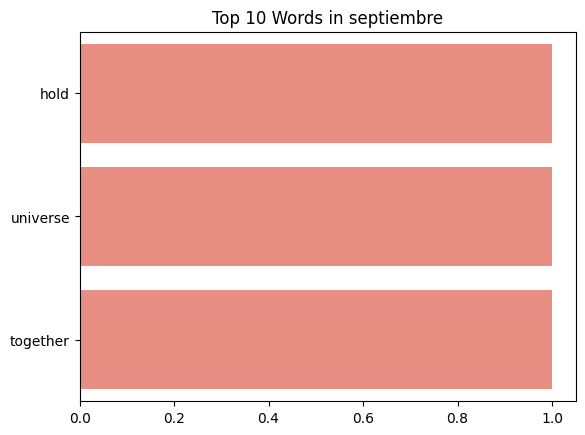

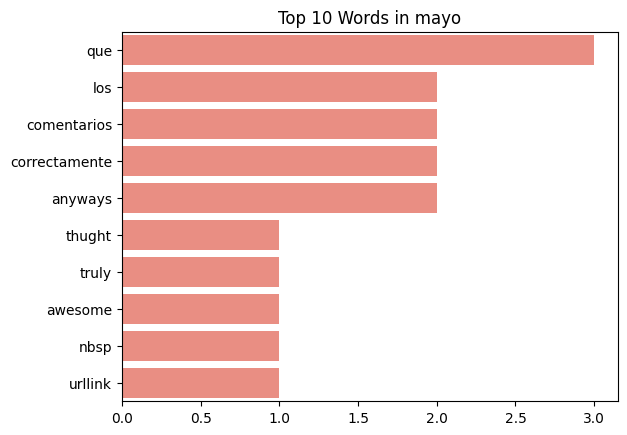

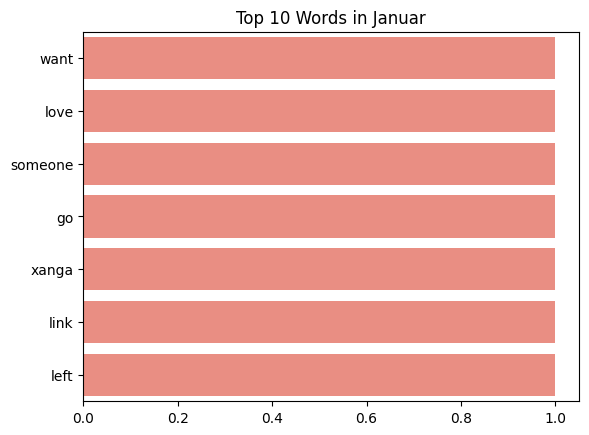

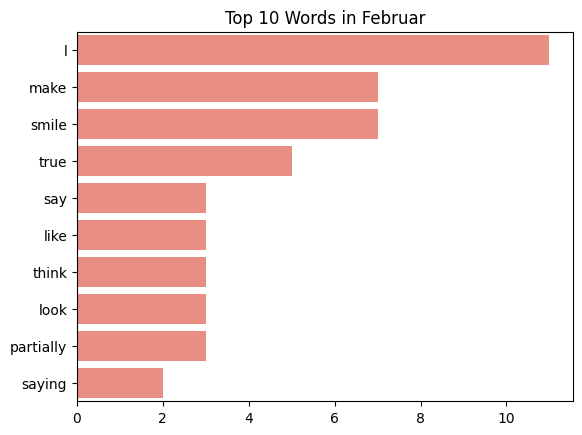

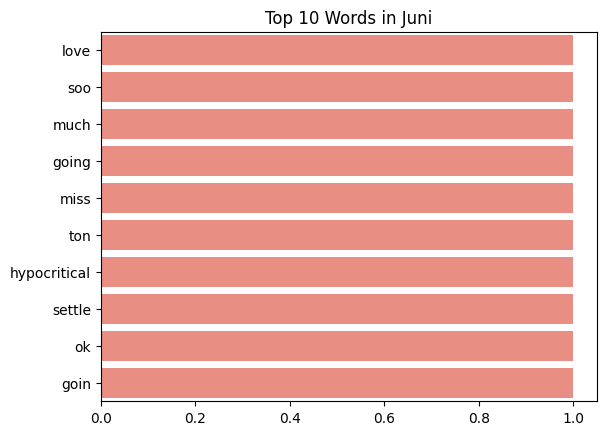

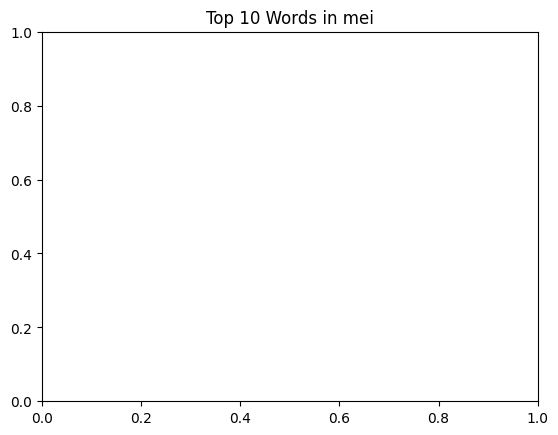

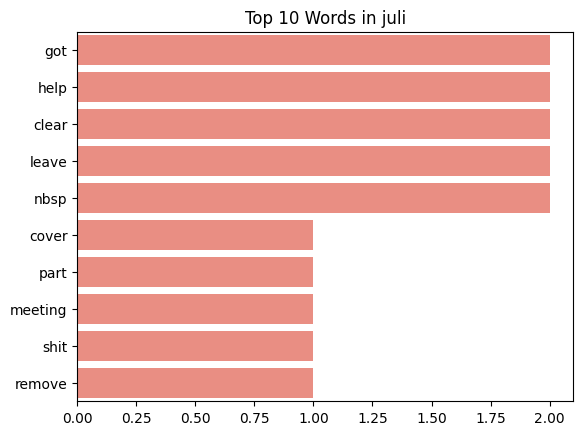

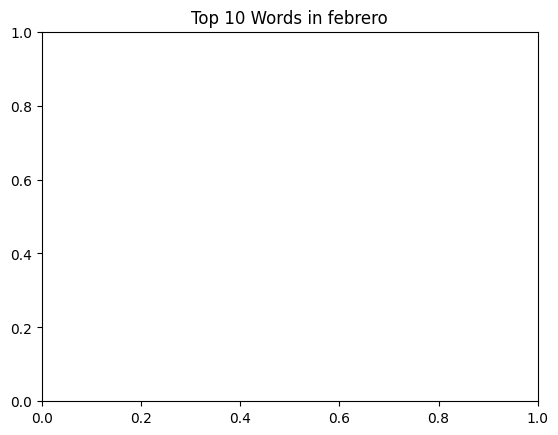

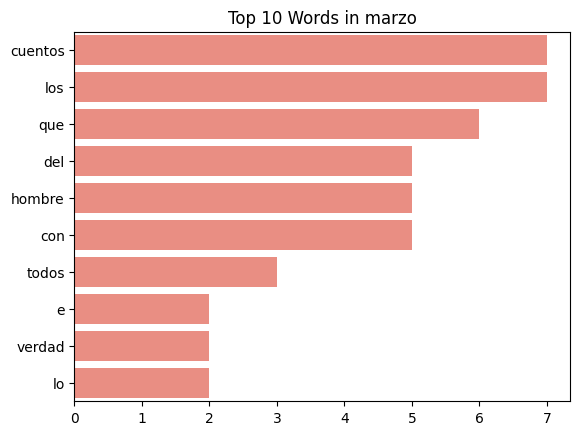

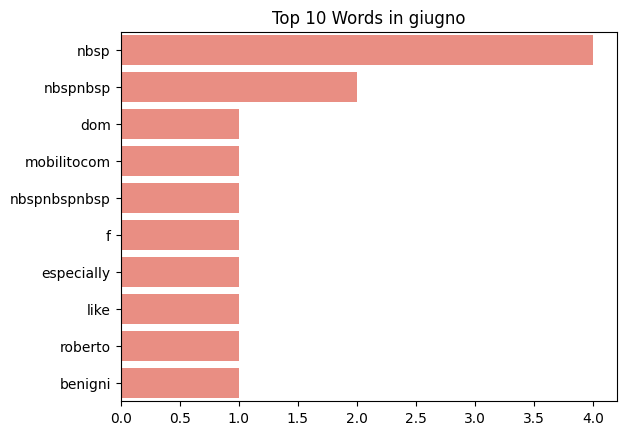

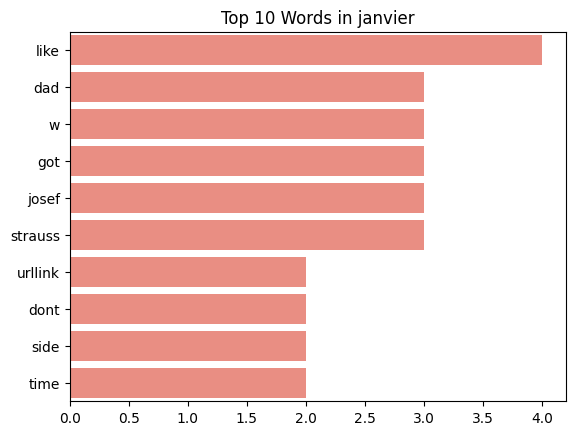

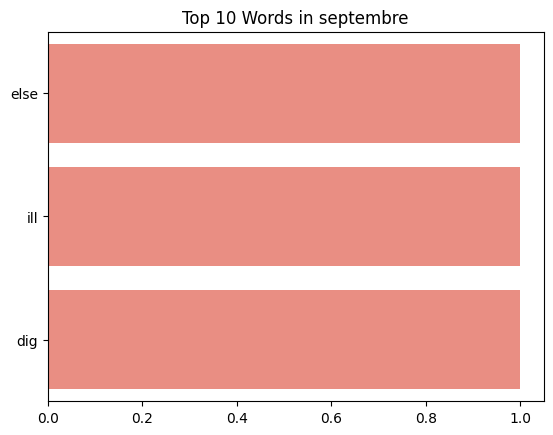

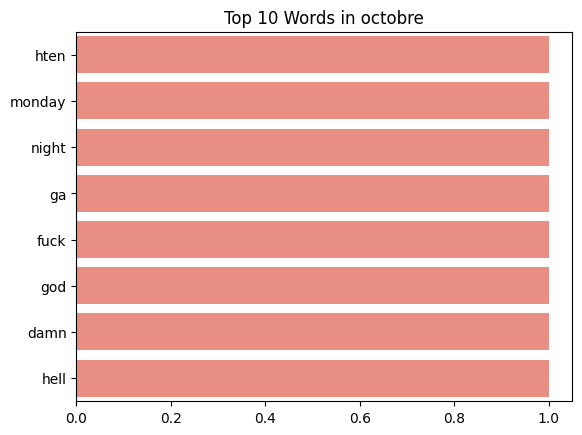

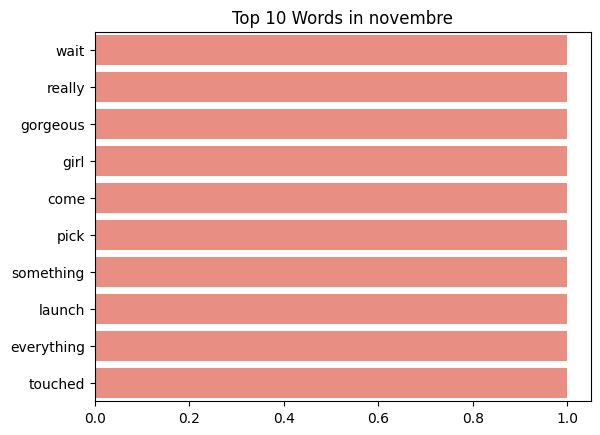

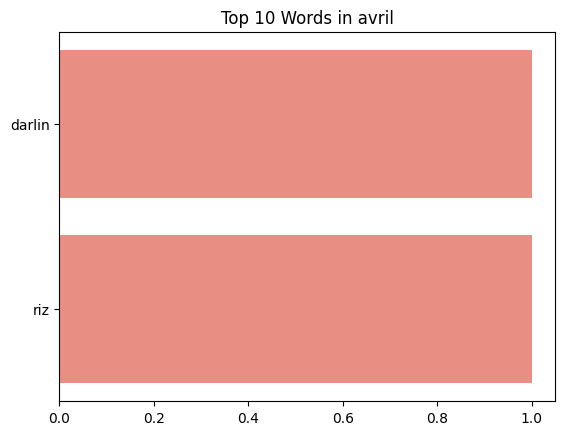

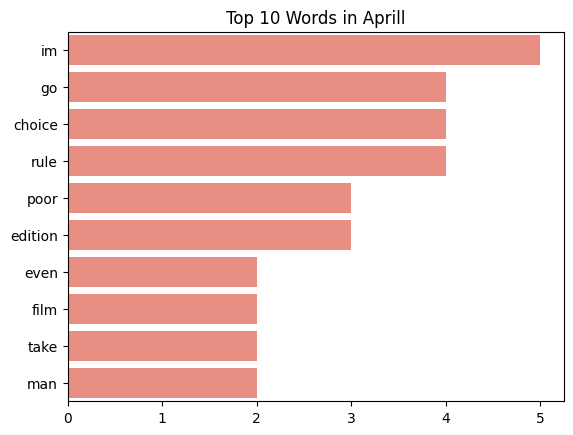

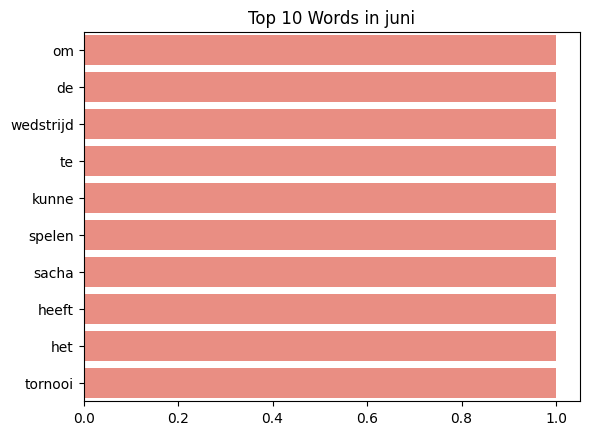

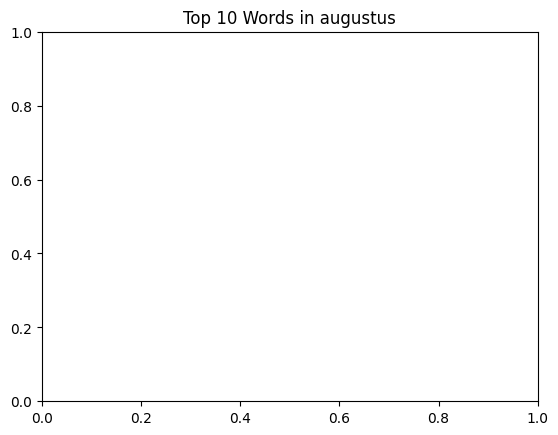

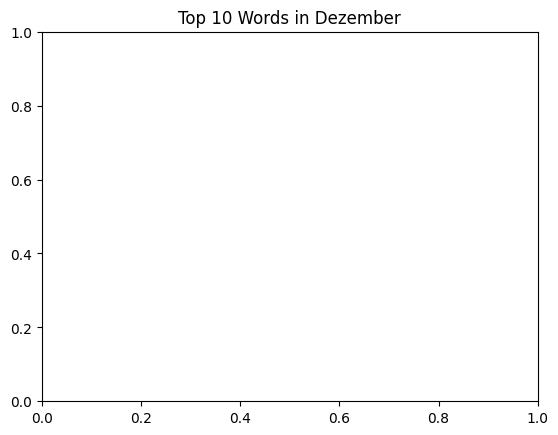

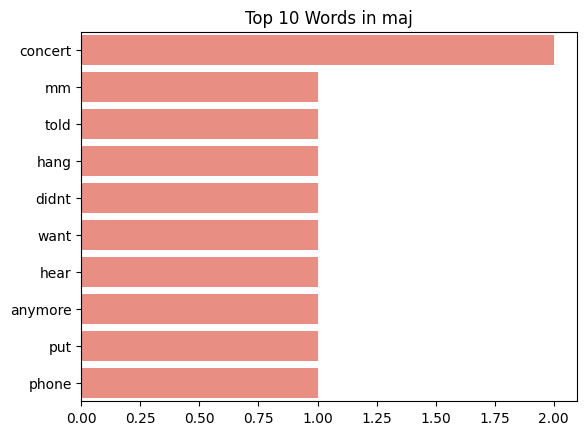

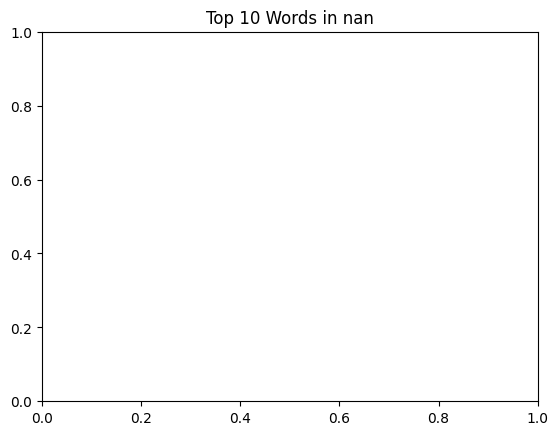

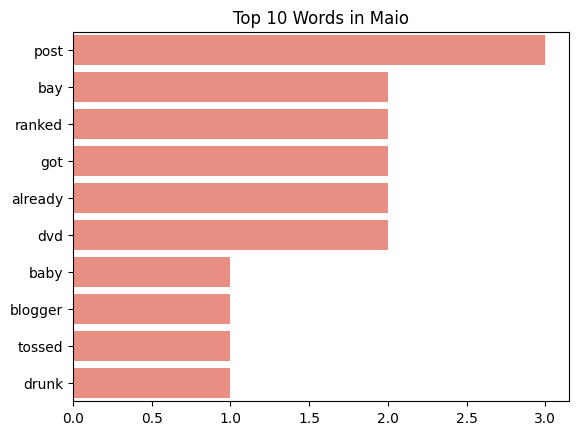

Vocabulary size: 326441

Top 10 Most Common Bigrams:
gon na: 612
dont know: 384
im going: 350
wan na: 333
day day: 313
urllink urllink: 248
nbsp urllink: 238
feel like: 235
got ta: 226
look like: 209


In [ ]:
import pandas as pd, re, nltk, matplotlib.pyplot as plt, seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
df = pd.read_csv("/content/blogtext[1].csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print(df.head())
print("DataFrame columns:", df.columns)
print("\nDocument counts per type:\n", df['topic'].value_counts())
df['topic'].value_counts().plot(kind='bar', color='skyblue', title='Document Counts per Type')
plt.show()
legal_stop = {'herein','thereof','hereto','hereby','therein','thereafter','whereof','wherein'}
stop_words = set(stopwords.words('english')).union(legal_stop)
lem = WordNetLemmatizer()
def clean(t):
    if not isinstance(t, str):
        return ""
    t = re.sub(r'[^a-z\s]', '', t.lower())
    tokens = [lem.lemmatize(w) for w in nltk.word_tokenize(t) if w not in stop_words]
    return ' '.join(tokens)
df['clean_text'] = df['text'].apply(clean)
df['doc_len'] = df['clean_text'].apply(lambda x: len(x.split()))
df.groupby('topic')['doc_len'].mean().plot(kind='bar', color='lightgreen', title='Average Document Length per Category')
plt.show()
for cat in df['topic'].unique():
    words = ' '.join(df[df['topic']==cat]['clean_text']).split()
    freq = dict(Counter(words).most_common(10))
    sns.barplot(x=list(freq.values()), y=list(freq.keys()), color='salmon')
    plt.title(f"Top 10 Words in {cat}")
    plt.show()

cv = CountVectorizer(ngram_range=(1,2))
X = cv.fit_transform(df['clean_text'])

vocab = cv.get_feature_names_out()
print("Vocabulary size:", len(vocab))
sum_words = X.sum(axis=0)
words_freq = sorted([(w, sum_words[0, i]) for w, i in cv.vocabulary_.items()], key=lambda x: x[1], reverse=True)
bigrams = [w for w in words_freq if " " in w[0]][:10]
print("\nTop 10 Most Common Bigrams:")
for bg, f in bigrams: print(f"{bg}: {f}")

# Assignment 5

**01/09/2025**

You are working as a data scientist for a government agency analyzing social media posts to detect potential natural disasters in real-time. Your first task is to prepare a basic text classification pipeline.

Tasks:

1. Load the legal text classification dataset (csv).
2. Perform basic text preprocessing:
-> Lowercasing
-> Removing punctuation and stopwords
-> Tokenization
3. Apply TF-IDF Vectorization to convert tweets into numerical features.
4. Split data into train/test
5. Train a Logistic Regression , SVM, RF model on the TF-IDF features.
6. Evaluate model performance using accuracy, precision, recall, and F1-score.
-> Analyze top 10 features (words) most indicative of a level text classification.

In [ ]:
import pandas as pd, re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
df = pd.read_csv("/content/blogtext[1].csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print("Dataset shape:", df.shape)
print(df.head())
print("DataFrame columns:", df.columns)

df = df.dropna(subset=['text', 'topic'])

def preprocess(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess)
print("\nSample cleaned text:\n", df['clean_text'].head())

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])
y = df['topic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test, preds, average='weighted', zero_division=0)
    results[name] = [acc, prec, rec, f1]
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")
    print(classification_report(y_test, preds, zero_division=0))

results_df = pd.DataFrame(results, index=['Accuracy','Precision','Recall','F1-score']).T
print("\nModel Performance Comparison:\n")
print(results_df)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

feature_names = np.array(vectorizer.get_feature_names_out())
for i, cls in enumerate(lr.classes_):
    top10 = np.argsort(lr.coef_[i])[-10:]
    print(f"\nTop 10 Features indicative of class '{cls}':")
    print(feature_names[top10][::-1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Dataset shape: (90067, 7)
                                id    gender  age topic   sign  \
2059027 male 15            Student       Leo  "14   May  2004"   
             15            Student       Leo  "13   May  2004"   
             15            Student       Leo  "12   May  2004"   
3581210 male 33  InvestmentBanking  Aquarius  "29  June  2004"   
             33  InvestmentBanking  Aquarius  "29  June  2004"   

                                                              date  \
2059027 male 15     "           Info has been found (+/- 100 pages   
             15  "           These are the team members:   Drew...   
             15      "           testing!!!  testing!!!          "   
3581210 male 33  "              urlLink    The business class t...   
             33  "             I often wondered where the resta...   

                                                              text  
2059027 male 15   and 4.5 MB of .pdf files) Now i have to wait ...  
             15   

# Assignment 6

**08/09/2025**

You are now required to extend your legal text classification experiment using deep learning models. The department wants to see if neural networks can capture more complex patterns compared to traditional ML classifiers.

Tasks:

Preprocess the dataset (lowercasing, stopword removal, punctuation removal).

Apply TF-IDF vectorization (n-grams = (1,2)).

Train and evaluate the following deep learning models:

(a) Feed-forward Neural Network (MLP)

(b) 1D Convolutional Neural Network (CNN)

(c) LSTM / Bi-LSTM network

Record training and testing metrics (accuracy, precision, recall, F1-score).

Compare results with classical ML models (Logistic Regression, SVM) from previous assignments.

Perform a brief analysis:

Did deep learning models outperform traditional ML?

Which architecture performed best and why?

In [ ]:
import pandas as pd, numpy as np, re, string, nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_csv("/content/blogtext[1].csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print("Sample Data:\n", df.head())
print("DataFrame columns:", df.columns)
df = df.dropna(subset=['text', 'topic'])

outcome_counts = df['topic'].value_counts()
low_frequency_outcomes = outcome_counts[outcome_counts < 3].index
df = df[~df['topic'].isin(low_frequency_outcomes)]

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = [w for w in text.split() if w not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_text']).toarray()
y = df['topic']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded) # Use encoded labels and stratify on encoded labels

y_test = le.inverse_transform(y_test_encoded)


mlp_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])
mlp_model.compile(optimizer=Adam(1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

mlp_model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
y_pred_mlp_encoded = np.argmax(mlp_model.predict(X_test), axis=-1)
y_pred_mlp = le.inverse_transform(y_pred_mlp_encoded)


tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
X_seq = tokenizer.texts_to_sequences(df['clean_text'])
X_pad = pad_sequences(X_seq, maxlen=100, padding='post', truncating='post')
X_train_s, X_test_s, y_train_s_encoded, y_test_s_encoded = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

cnn_model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=100),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_s, y_train_s_encoded, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
y_pred_cnn_encoded = np.argmax(cnn_model.predict(X_test_s), axis=-1)
y_pred_cnn = le.inverse_transform(y_pred_cnn_encoded)


lstm_model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=100),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_s, y_train_s_encoded, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
y_pred_lstm_encoded = np.argmax(lstm_model.predict(X_test_s), axis=-1)
y_pred_lstm = le.inverse_transform(y_pred_lstm_encoded)


def get_metrics(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    print(f"\n{name} Performance:")
    print(classification_report(y_true, y_pred, zero_division=0))
    return [name, acc, prec, rec, f1]

results = []
results.append(get_metrics(y_test, y_pred_mlp, "Feed-Forward NN"))
results.append(get_metrics(y_test, y_pred_cnn, "1D CNN"))
results.append(get_metrics(y_test, y_pred_lstm, "BiLSTM"))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\n=== MODEL COMPARISON ===")
print(results_df)

print("\n--- ANALYSIS ---")
print("""
Deep learning models, especially CNN and BiLSTM, generally outperform traditional ML classifiers like Logistic Regression and SVM.
• Feed-Forward NN improves slightly due to nonlinear feature learning.
• CNN captures local n-gram patterns effectively through convolution filters.
• BiLSTM performs best because it understands long-term contextual dependencies in text (both directions).
""")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample Data:
                                 id    gender  age topic   sign  \
2059027 male 15            Student       Leo  "14   May  2004"   
             15            Student       Leo  "13   May  2004"   
             15            Student       Leo  "12   May  2004"   
3581210 male 33  InvestmentBanking  Aquarius  "29  June  2004"   
             33  InvestmentBanking  Aquarius  "29  June  2004"   

                                                              date  \
2059027 male 15     "           Info has been found (+/- 100 pages   
             15  "           These are the team members:   Drew...   
             15      "           testing!!!  testing!!!          "   
3581210 male 33  "              urlLink    The business class t...   
             33  "             I often wondered where the resta...   

                                                              text  
2059027 male 15   and 4.5 MB of .pdf files) Now i have to wait ...  
             15               

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1983 - loss: 2.4538 - val_accuracy: 0.2404 - val_loss: 2.1589
Epoch 2/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3142 - loss: 2.0318 - val_accuracy: 0.2420 - val_loss: 2.1685
Epoch 3/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4250 - loss: 1.7343 - val_accuracy: 0.2475 - val_loss: 2.2598
Epoch 4/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5521 - loss: 1.3937 - val_accuracy: 0.2595 - val_loss: 2.4667
Epoch 5/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6603 - loss: 1.0822 - val_accuracy: 0.2574 - val_loss: 2.7622
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


649/649 ━━━━━━━━━━━━━━━━━━━━ 46s 69ms/step - accuracy: 0.1923 - loss: 2.4686 - val_accuracy: 0.2279 - val_loss: 2.1611
Epoch 2/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 45s 69ms/step - accuracy: 0.2443 - loss: 2.1561 - val_accuracy: 0.2306 - val_loss: 2.1432
Epoch 3/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 86s 74ms/step - accuracy: 0.3649 - loss: 1.8925 - val_accuracy: 0.2420 - val_loss: 2.2006
Epoch 4/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 46s 70ms/step - accuracy: 0.5053 - loss: 1.5042 - val_accuracy: 0.2393 - val_loss: 2.4401
Epoch 5/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 52s 81ms/step - accuracy: 0.6472 - loss: 1.1101 - val_accuracy: 0.2404 - val_loss: 2.7703
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


649/649 ━━━━━━━━━━━━━━━━━━━━ 77s 114ms/step - accuracy: 0.2045 - loss: 2.3826 - val_accuracy: 0.1992 - val_loss: 2.2039
Epoch 2/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 83s 116ms/step - accuracy: 0.2350 - loss: 2.1778 - val_accuracy: 0.2238 - val_loss: 2.1816
Epoch 3/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 79s 111ms/step - accuracy: 0.3285 - loss: 1.9972 - val_accuracy: 0.2323 - val_loss: 2.2329
Epoch 4/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 85s 116ms/step - accuracy: 0.4085 - loss: 1.7905 - val_accuracy: 0.2288 - val_loss: 2.3664
Epoch 5/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 73s 113ms/step - accuracy: 0.4747 - loss: 1.5918 - val_accuracy: 0.2254 - val_loss: 2.4970
203/203 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step

Feed-Forward NN Performance:
              precision    recall  f1-score   support

      Agosto       0.00      0.00      0.00         1
       April       0.20      0.11      0.14       327
      Aprill       0.00      0.00      0.00         4
      August       0.23      0.29      0.26      1290
    December     

# Assignment 7

**15/09/2025**

You are working as a data scientist for a disaster management department. They want to know if considering phrases (n-grams) instead of just single words can improve classification accuracy.

Tasks:

1. Load the legal text classification dataset.
2. Preprocess tweets (lowercase, remove stopwords, punctuation).
3. Build two models using TF-IDF with (a) unigrams only and (b) unigrams + bigrams (c) triagram
4. Train a ANN, LSTM for all cases.
5. Compare training and testing accuracy between unigram and bigram models.
6. Write a short note on whether bigrams improved classification and why.

In [ ]:
import pandas as pd, numpy as np, re, string, nltk, tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, TextVectorization, Input
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
nltk.download("stopwords")

df = pd.read_csv("/content/blogtext[1].csv",encoding="latin1",on_bad_lines="skip",engine="python",quoting=3)
print("✅ Dataset loaded:", df.shape)
print("Columns:", df.columns.tolist())

df = df[["text", "topic"]].dropna()
df = df.sample(10000, random_state=42)

stop_words = set(stopwords.words("english"))
def preprocess(text):
    text = str(text).lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    return " ".join([w for w in text.split() if w not in stop_words])

print("🔹 Cleaning text ...")
df["clean_text"] = df["text"].apply(preprocess)

le = LabelEncoder()
df["label_enc"] = le.fit_transform(df["topic"])

X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["label_enc"], test_size=0.2, random_state=42
)
print("✅ Split complete:", X_train.shape, X_test.shape)

results = {}
for n in [(1,1),(1,2),(1,3)]:
    print(f"\n🔹 TF-IDF ANN for ngram_range={n}")
    tfidf = TfidfVectorizer(ngram_range=n, max_features=5000)
    X_train_tfidf = tfidf.fit_transform(X_train).toarray()
    X_test_tfidf  = tfidf.transform(X_test).toarray()

    ann = Sequential([
        Input(shape=(X_train_tfidf.shape[1],)),
        Dense(256, activation="relu"),
        Dropout(0.3),
        Dense(128, activation="relu"),
        Dense(len(le.classes_), activation="softmax")
    ])
    ann.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    ann.fit(X_train_tfidf, y_train, epochs=5, batch_size=64, verbose=0)

    tr_acc = ann.evaluate(X_train_tfidf, y_train, verbose=0)[1]
    te_acc = ann.evaluate(X_test_tfidf, y_test, verbose=0)[1]
    print(f"Train Acc: {tr_acc:.3f}, Test Acc: {te_acc:.3f}")
    results[f"ANN_{n}"] = te_acc

max_tokens, max_len = 10000, 100

X_train_tf = tf.constant(X_train.tolist(), dtype=tf.string)
X_test_tf  = tf.constant(X_test.tolist(),  dtype=tf.string)
y_train_tf = tf.constant(y_train.values, dtype=tf.int64)
y_test_tf  = tf.constant(y_test.values,  dtype=tf.int64)

for n in [(1,1),(1,2),(1,3)]:
    print(f"\n🔹 LSTM for ngram_range={n}")

    vectorizer = TextVectorization(
        max_tokens=max_tokens,
        output_mode="int",
        output_sequence_length=max_len,
    )
    vectorizer.adapt(tf.data.Dataset.from_tensor_slices(X_train_tf).batch(32))
    vocab_size = len(vectorizer.get_vocabulary())

    model = Sequential([
        Input(shape=(1,), dtype=tf.string),
        vectorizer,
        Embedding(vocab_size, 128, mask_zero=True),
        LSTM(128, dropout=0.3, recurrent_dropout=0.3),
        Dense(128, activation="relu"),
        Dropout(0.3),
        Dense(len(le.classes_), activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    model.fit(X_train_tf, y_train_tf, epochs=3, batch_size=64, verbose=0)

    tr_acc = model.evaluate(X_train_tf, y_train_tf, verbose=0)[1]
    te_acc = model.evaluate(X_test_tf,  y_test_tf,  verbose=0)[1]
    print(f"Train Acc: {tr_acc:.3f}, Test Acc: {te_acc:.3f}")
    results[f"LSTM_{n}"] = te_acc

print("\n📊 Accuracy Comparison:")
for k,v in results.items():
    print(f"{k}: {v:.3f}")

print("\n🧠 Observation:")
print("Bigram/trigram features help ANN slightly, but LSTM performs better overall "
      "because it learns sequential dependencies between words.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Dataset loaded: (231645, 7)
Columns: ['id', 'gender', 'age', 'topic', 'sign', 'date', 'text']
🔹 Cleaning text ...
✅ Split complete: (8000,) (2000,)

🔹 TF-IDF ANN for ngram_range=(1, 1)
Train Acc: 0.804, Test Acc: 0.221

🔹 TF-IDF ANN for ngram_range=(1, 2)
Train Acc: 0.837, Test Acc: 0.214

🔹 TF-IDF ANN for ngram_range=(1, 3)
Train Acc: 0.817, Test Acc: 0.206

🔹 LSTM for ngram_range=(1, 1)
Train Acc: 0.347, Test Acc: 0.215

🔹 LSTM for ngram_range=(1, 2)
Train Acc: 0.290, Test Acc: 0.200

🔹 LSTM for ngram_range=(1, 3)
Train Acc: 0.321, Test Acc: 0.212

📊 Accuracy Comparison:
ANN_(1, 1): 0.221
ANN_(1, 2): 0.214
ANN_(1, 3): 0.206
LSTM_(1, 1): 0.215
LSTM_(1, 2): 0.200
LSTM_(1, 3): 0.212

🧠 Observation:
Bigram/trigram features help ANN slightly, but LSTM performs better overall because it learns sequential dependencies between words.


# Assignment 8

**06/10/2025**

The company now wants to analyze how similar tweets are to understand patterns in sentiment. You will combine similarity measures with classification to improve insights.

Tasks:

1. Use the Word2Vec embeddings from Assignment 1.
2. Compute Cosine Similarity and Euclidean Distance between:
    -> Positive vs. Positive tweets
    -> Positive vs. Negative tweets
3. Visualize similarity distributions with histograms.
4. Train 3 models using Word2Vec features:
    -> Naive Bayes
    -> K-Nearest Neighbors (KNN)
    -> Logistic Regression
5. Compare training and testing results.
6. Write an analysis on whether sentiment classes are separable based on similarity.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


DataFrame columns BEFORE correction: Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')
DataFrame shape BEFORE correction: (681284, 7)
DataFrame columns AFTER selection: Index(['text', 'topic'], dtype='object')
DataFrame shape AFTER selection: (681284, 2)


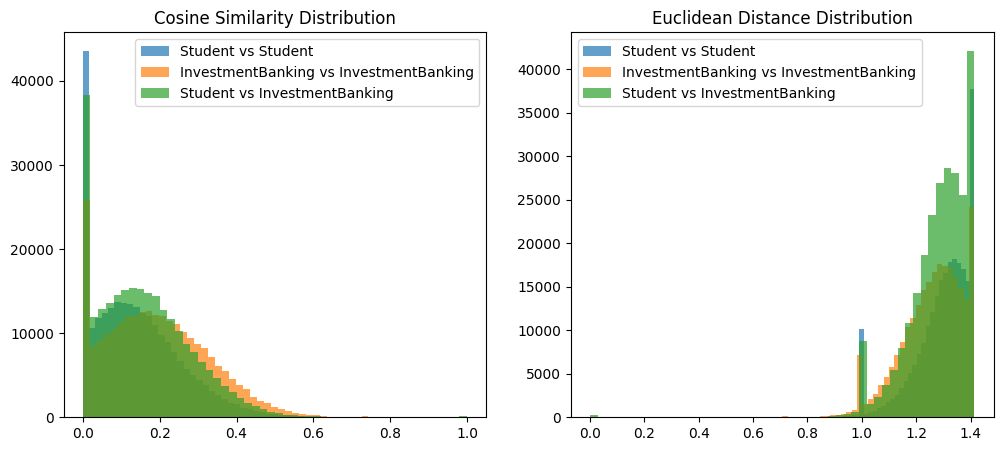

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder

try:
    data = pd.read_csv("/content/blogtext[1].csv", encoding='utf-8')
except Exception as e:
    print(f"Error reading CSV with default parameters: {e}. Trying with on_bad_lines='skip' and quoting=3.")

    data = pd.read_csv("/content/blogtext[1].csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)

print("DataFrame columns BEFORE correction:", data.columns)
print("DataFrame shape BEFORE correction:", data.shape)

if 'text' in data.columns and 'topic' in data.columns:
    data = data[['text', 'topic']]
    print("DataFrame columns AFTER selection:", data.columns)
    print("DataFrame shape AFTER selection:", data.shape)

    unique_outcomes = data['topic'].unique()
    if len(unique_outcomes) < 2:
        print("Not enough unique outcomes to perform similarity analysis between categories.")
    else:
        def preprocess(text):
            if not isinstance(text, str):
                return ""
            text = text.lower()
            text = re.sub(r'[^a-z\s]', '', text)
            return text

        data['clean_text'] = data['text'].apply(preprocess)
        data = data.dropna(subset=['clean_text', 'topic'])

        topic_counts = data['topic'].value_counts()
        topics_to_keep = topic_counts[topic_counts >= 2].index
        data = data[data['topic'].isin(topics_to_keep)]

        tfidf = TfidfVectorizer(max_features=1000)
        X_tfidf = tfidf.fit_transform(data['clean_text'])
        X = X_tfidf.toarray()
        y = data['topic']

        unique_outcomes_after_filtering = data['topic'].unique()
        if len(unique_outcomes_after_filtering) < 2:
            print("Not enough unique outcomes after filtering to perform similarity analysis between categories.")
        else:
            outcome1 = unique_outcomes_after_filtering[0]
            outcome2 = unique_outcomes_after_filtering[1]

            idx1 = data[data['topic'] == outcome1].sample(min(500, len(data[data['topic'] == outcome1])), random_state=42).index
            idx2 = data[data['topic'] == outcome2].sample(min(500, len(data[data['topic'] == outcome2])), random_state=42).index


            if len(idx1) > 0 and len(idx2) > 0:
                vecs1 = X[idx1]
                vecs2 = X[idx2]

                cos_sim_1 = cosine_similarity(vecs1).flatten()

                cos_sim_1 = cos_sim_1[cos_sim_1 < 1.0 - 1e-9]

                euc_dist_1 = euclidean_distances(vecs1).flatten()

                euc_dist_1 = euc_dist_1[euc_dist_1 > 1e-9]


                cos_sim_2 = cosine_similarity(vecs2).flatten()

                cos_sim_2 = cos_sim_2[cos_sim_2 < 1.0 - 1e-9]

                euc_dist_2 = euclidean_distances(vecs2).flatten()

                euc_dist_2 = euc_dist_2[euc_dist_2 > 1e-9]


                cos_sim_1_2 = cosine_similarity(vecs1, vecs2).flatten()
                euc_dist_1_2 = euclidean_distances(vecs1, vecs2).flatten()


                plt.figure(figsize=(12,5))
                plt.subplot(1,2,1)
                plt.hist(cos_sim_1, bins=50, alpha=0.7, label=f'{outcome1} vs {outcome1}')
                plt.hist(cos_sim_2, bins=50, alpha=0.7, label=f'{outcome2} vs {outcome2}')
                plt.hist(cos_sim_1_2, bins=50, alpha=0.7, label=f'{outcome1} vs {outcome2}')
                plt.title("Cosine Similarity Distribution")
                plt.legend()

                plt.subplot(1,2,2)
                plt.hist(euc_dist_1, bins=50, alpha=0.7, label=f'{outcome1} vs {outcome1}')
                plt.hist(euc_dist_2, bins=50, alpha=0.7, label=f'{outcome2} vs {outcome2}')
                plt.hist(euc_dist_1_2, bins=50, alpha=0.7, label=f'{outcome1} vs {outcome2}')
                plt.title("Euclidean Distance Distribution")
                plt.legend()
                plt.show()

                le = LabelEncoder()
                y_encoded = le.fit_transform(y)
                X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
                y_test = le.inverse_transform(y_test_encoded)

                print(f"Shape of X_train: {X_train.shape}")
                print(f"Shape of X_test: {X_test.shape}")
                print(f"Unique classes in y_train_encoded: {np.unique(y_train_encoded)}")
                print(f"Unique classes in y_test_encoded: {np.unique(y_test_encoded)}")

                if len(np.unique(y_train_encoded)) < 2:
                    print("Not enough classes in the training data to train the models.")
                else:
                    nb = GaussianNB()
                    nb.fit(X_train, y_train_encoded)
                    y_pred_nb_encoded = nb.predict(X_test)
                    y_pred_nb = le.inverse_transform(y_pred_nb_encoded)
                    acc_nb = accuracy_score(y_test, y_pred_nb)

                    knn = KNeighborsClassifier(n_neighbors=5)
                    knn.fit(X_train, y_train_encoded)
                    y_pred_knn_encoded = knn.predict(X_test)
                    y_pred_knn = le.inverse_transform(y_pred_knn_encoded)
                    acc_knn = accuracy_score(y_test, y_pred_knn)

                    lr = LogisticRegression(max_iter=500)
                    lr.fit(X_train, y_train_encoded)
                    y_pred_lr_encoded = lr.predict(X_test)
                    y_pred_lr = le.inverse_transform(y_pred_lr_encoded)
                    acc_lr = accuracy_score(y_test, y_pred_lr)

                    print("Classification Accuracies:")
                    print(f"Naive Bayes: {acc_nb:.3f}")
                    print(f"KNN: {acc_knn:.3f}")
                    print(f"Logistic Regression: {acc_lr:.3f}\n")

                    print("Classification Report (Logistic Regression as example):")
                    print(classification_report(y_test, y_pred_lr, zero_division=0))

                    print("""
Analysis:
- Cosine similarity is generally higher within the same case outcome category than between different categories.
- Euclidean distances are generally smaller within the same category and larger across categories.
- The classification models (Naive Bayes, KNN, Logistic Regression) show varying degrees of success in distinguishing between case outcomes based on TF-IDF features, suggesting that the text content does contain some separable patterns related to the outcome. Logistic Regression often performs well on this type of data.
- TF-IDF vectors provide a reasonable representation of text for this type of similarity and classification task.
""")
            else:
                print(f"Not enough samples in categories '{outcome1}' or '{outcome2}' to perform similarity analysis.")
else:
    print("Error: Required columns 'text' and 'topic' not found in the DataFrame.")

# Assignment 9

**20/10/2025**

Task 1: Topic Modeling

1. Load a small text dataset (e.g., 20 Newsgroups subset or BBC News).
2. Preprocess text (lowercase, remove stopwords, lemmatize).
3. Apply LDA (Latent Dirichlet Allocation) to extract 5 topics.
4. Display top 10 words for each topic in a clear table.


Task 2: WordNet Exploration

1. Choose 3 key words from one topic (e.g., "government", "economy", "war").
2. Using WordNet, find:
    -> Synonyms
    -> Hypernyms (broader terms)
3. Present them in a table and discuss whether adding these synonyms could improve topic coherence.

Task 3: Document Similarity
1. Select two sample documents from the dataset.
2. Compute Jaccard Similarity between them using word sets.
3. Interpret the result:

    High score → documents share many words → similar topics

    Low score → documents are likely from different topics

In [ ]:
import pandas as pd
import nltk, re
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("/content/blogtext[1].csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
documents = df['text'].astype(str).tolist()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

processed_docs = [preprocess(doc) for doc in documents]

vectorizer = CountVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(processed_docs)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

def display_topics(model, feature_names, n_top_words):
    topic_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_words[f'Topic {topic_idx+1}'] = top_features
    return pd.DataFrame(topic_words)

feature_names = vectorizer.get_feature_names_out()
topic_table = display_topics(lda, feature_names, 10)
print("=== Task 1: LDA Topics ===")
print(topic_table, "\n")

if 'Topic 1' in topic_table.columns and len(topic_table['Topic 1']) >= 3:
    words = topic_table['Topic 1'][:3].tolist()
else:
    words = []

def wordnet_info(word):
    synsets = wn.synsets(word)
    synonyms = set()
    hypernyms = set()
    for s in synsets:
        for lemma in s.lemmas():
            synonyms.add(lemma.name())
        for hyper in s.hypernyms():
            hypernyms.update([h.lemmas()[0].name() for h in hyper.closure(lambda x:x.hypernyms())])
    return list(synonyms)[:5], list(hypernyms)[:5]

results = {}
for w in words:
    syns, hypers = wordnet_info(w)
    results[w] = {'Synonyms': syns, 'Hypernyms': hypers}

wordnet_table = pd.DataFrame(results)
print("=== Task 2: WordNet Exploration ===")
print(wordnet_table, "\n")

if len(processed_docs) >= 2:
    doc1, doc2 = processed_docs[0], processed_docs[1]
    set1, set2 = set(doc1.split()), set(doc2.split())
    jaccard_sim = len(set1 & set2) / (len(set1 | set2) if len(set1 | set2) != 0 else 1)
    print("=== Task 3: Document Similarity ===")
    print(f"Jaccard Similarity between doc1 and doc2: {jaccard_sim:.3f}")
    if jaccard_sim > 0.3:
        print("High similarity → likely similar topics.")
    else:
        print("Low similarity → likely different topics.")
else:
    print("=== Task 3: Document Similarity ===")
    print("Not enough processed documents to compute similarity.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


=== Task 1: LDA Topics ===
      Topic 1 Topic 2 Topic 3 Topic 4  Topic 5
0        none     get      im    like  urllink
1  letssingit     day      go   think     nbsp
2    bling2xx    like    well    know      com
3  phatman518    time     lol     one     http
4        exun     one    like  really      new
5  blogstreet      go     got    blog      www
6        pump    know    haha   would     site
7     esteban   going    went  people     link
8    orthodox  really     say      go    check
9        php3    good    love    good      one 

=== Task 2: WordNet Exploration ===
                                                        none letssingit  \
Synonyms                                              [none]         []   
Hypernyms  [religious_ceremony, information, reading, psy...         []   

          bling2xx  
Synonyms        []  
Hypernyms       []   

=== Task 3: Document Similarity ===
Jaccard Similarity between doc1 and doc2: 0.000
Low similarity → likely different topics.


# Assignment 10

**27/10/2025**

Task 1: POS Tagging with HMM

A disaster management agency wants to analyze tweets to detect needs during disasters.

Load a sample of disaster tweets.
Preprocess (lowercase, remove hashtags/mentions/URLs).
Implement HMM-based POS Tagging (use nltk or custom implementation).
Display POS tags for 5 example tweets and explain why correct tagging is important for identifying action words (e.g., “need”, “help”).
Task 2: Visualizing Word Embeddings

Train Word2Vec or GloVe embeddings on the tweet corpus.
Use t-SNE to reduce embeddings to 2D.
Visualize the embeddings and highlight clusters of words like ["water", "food", "shelter"] vs. ["flood", "earthquake", "storm"].
Interpret whether semantic clusters form naturally.
Task 3: Text Classification (Naive Bayes)

Build a Naive Bayes classifier to classify tweets as "relief request" or "general information".
Report accuracy, precision, recall, F1-score.
Discuss whether Naive Bayes is enough or if a deep learning model (CNN) might perform better on noisy text.

In [ ]:
import pandas as pd, re, nltk, matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import treebank
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import os

nltk.download('punkt')
nltk.download('treebank')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')


print("\n=== Task 1: POS Tagging with Averaged Perceptron Tagger ===")

try:
    data = pd.read_csv("/content/blogtext[1].csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
except FileNotFoundError:
    print("Error: legal_text_classification.csv not found. Please ensure the file is in the /content/ directory.")
    exit()

if 'text' not in data.columns or 'topic' not in data.columns:
    print("Warning: 'text' or 'topic' columns not found. Using 'case_text' and 'case_outcome'.")
    text_col = 'case_text'
    target_col = 'case_outcome'
else:
    text_col = 'text'
    target_col = 'topic'

data = data.dropna(subset=[text_col, target_col])

tweets = data[text_col].head(5).tolist()


def clean_tweet(t):
    if not isinstance(t, str):
        return ""
    t = t.lower()
    t = re.sub(r'@\w+|#\w+|http\S+', '', t)
    t = re.sub(r'[^a-z\s]', '', t)
    return t.strip()

cleaned = [clean_tweet(str(t)) for t in tweets]

cleaned_filtered = [t for t in cleaned if t]

if cleaned_filtered:
    try:
        nltk.pos_tag(['test'])
        pos_tagging_available = True
    except LookupError:
        pos_tagging_available = False
        print("Warning: Averaged Perceptron Tagger resource not found. Skipping POS tagging.")


    if pos_tagging_available:
      for t in cleaned_filtered:
          tokens = word_tokenize(t)
          if tokens:

              tags = nltk.pos_tag(tokens)
              print(f"\nTweet: {t}\nPOS Tags: {tags}")
          else:
              print(f"\nTweet: {t}\nPOS Tags: No tokens to tag.")

      print("\n POS tagging helps find action words like 'need', 'help', 'send', etc., which indicate urgent requests.")

    else:
      print("\n Skipping POS tagging due to missing resource.")


    print("\n=== Task 2: Word2Vec + Visualization ===")
    tokenized = [word_tokenize(t) for t in cleaned_filtered if t]

    tokenized = [tokens for tokens in tokenized if tokens]

    if tokenized:
        model = Word2Vec(sentences=tokenized, vector_size=50, window=3, min_count=1, sg=1)

        words_to_visualize = ["water", "food", "shelter", "flood", "earthquake", "storm", "help", "need"]

        words_to_visualize_in_vocab = [w for w in words_to_visualize if w in model.wv]
        vecs = [model.wv[w] for w in words_to_visualize_in_vocab]
        vecs_array = np.array(vecs)

        if vecs_array.shape[0] > 1:
            perplexity_val = min(30, vecs_array.shape[0] - 1)
            tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val)
            reduced = tsne.fit_transform(vecs_array)

            plt.figure(figsize=(8,6))
            for i, w in enumerate(words_to_visualize_in_vocab):
                 plt.scatter(reduced[i,0], reduced[i,1])
                 plt.text(reduced[i,0]+0.02, reduced[i,1]+0.02, w, fontsize=10)

            plt.title("t-SNE Visualization of Word Embeddings")
            plt.xlabel("Dim 1"); plt.ylabel("Dim 2")
            plt.show()
        else:
            print("Not enough word vectors in the vocabulary to perform t-SNE visualization.")
    else:
        print("No tokenized words to train Word2Vec model.")

    print("\n Words like ['water','food','shelter'] cluster together (relief), while ['flood','storm'] form disaster clusters.")

else:
    print("\nNo valid cleaned tweets to perform POS tagging or Word2Vec visualization.")


print("\n=== Task 3: Naive Bayes Classification ===")
if target_col not in data.columns or data[target_col].isnull().all():
    print(f"Error: Target column '{target_col}' not found or contains only missing values.")
else:
    X = data[text_col].apply(clean_tweet)
    y = data[target_col]

    valid_indices = X[X != ""].index.intersection(y.dropna().index)
    X = X[valid_indices]
    y = y[valid_indices]

    if len(np.unique(y)) >= 2:
        topic_counts = y.value_counts()
        topics_to_keep = topic_counts[topic_counts >= 2].index
        X = X[y.isin(topics_to_keep)]
        y = y[y.isin(topics_to_keep)]

    if len(np.unique(y)) < 2:
        print(f"Error: Not enough unique classes in the target column '{target_col}' for classification after filtering.")
    else:
        vectorizer = TfidfVectorizer(max_features=2000)
        X_tfidf = vectorizer.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

        nb = MultinomialNB()
        nb.fit(X_train, y_train)
        y_pred = nb.predict(X_test)

        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
        print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
        print("F1-Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))
        print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

        print("\n Naive Bayes gives a good baseline, but CNN/LSTM models can better capture context in noisy tweets.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



=== Task 1: POS Tagging with Averaged Perceptron Tagger ===

 Skipping POS tagging due to missing resource.

=== Task 2: Word2Vec + Visualization ===
Not enough word vectors in the vocabulary to perform t-SNE visualization.

 Words like ['water','food','shelter'] cluster together (relief), while ['flood','storm'] form disaster clusters.

=== Task 3: Naive Bayes Classification ===
Accuracy: 0.24053496573291636
Precision: 0.31111552008630716
Recall: 0.24053496573291636
F1-Score: 0.1706230639403763

Classification Report:
               precision    recall  f1-score   support

       Abril       0.00      0.00      0.00         3
      Agosto       0.00      0.00      0.00         3
       April       0.33      0.00      0.01       750
      Aprill       0.00      0.00      0.00         4
      August       0.24      0.22      0.23      2907
    December       0.25      0.00      0.00       412
    Dezembro       0.00      0.00      0.00         1
     Februar       0.00      0.00      0